In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
col_names= ["Id","Topic/Entity","Sentiment", "Comment"]
df1 = pd.read_csv("C:\\Users\\DELL\\Downloads\\pd\\twitter_training.csv", names = col_names)
df2 = pd.read_csv("C:\\Users\\DELL\\Downloads\\pd\\twitter_validation.csv", names= col_names)


In [3]:
df1

,Id,Topic/Entity,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df2

,Id,Topic/Entity,Sentiment,Comment
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
#data cleaning
df=  pd.concat([df1,df2]).reset_index()

In [6]:
df

,index,Id,Topic/Entity,Sentiment,Comment
0,0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
75677,995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
df.drop(columns="index", inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            75682 non-null  int64 
 1   Topic/Entity  75682 non-null  object
 2   Sentiment     75682 non-null  object
 3   Comment       74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df.isnull().sum()

Id                0
Topic/Entity      0
Sentiment         0
Comment         686
dtype: int64

In [10]:
df.dropna(inplace= True)

In [11]:
df["Topic/Entity"].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [12]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [13]:
df.loc[df["Sentiment"]=="Irrelevant"]

,Id,Topic/Entity,Sentiment,Comment
102,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
103,2418,Borderlands,Irrelevant,Appreciate the (sound) concepts / practices th...
104,2418,Borderlands,Irrelevant,Evaluate the (sound) concepts / concepts of Va...
105,2418,Borderlands,Irrelevant,Appreciate the (sonic) concepts / praxis Valen...
106,2418,Borderlands,Irrelevant,Appreciate by the ( sonic ) electronic concept...
...,...,...,...,...
75657,12949,Xbox(Xseries),Irrelevant,Microsoft Apparently Has 16 First-Party Xbox S...
75660,10128,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,How Abhijeet Bhayya ur efforts are incredible ...
75669,4905,GrandTheftAuto(GTA),Irrelevant,The ultimate pruning machine! @stihlusa GTA 26...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...


In [14]:
df["Sentiment"]=df["Sentiment"].replace("Irrelevant", "Neutral")

In [15]:
df

,Id,Topic/Entity,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Neutral,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Neutral,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df.isnull().sum()

Id              0
Topic/Entity    0
Sentiment       0
Comment         0
dtype: int64

In [17]:
df.shape

(74996, 4)

In [18]:
df.drop_duplicates(inplace= True)

In [19]:
df.shape

(72139, 4)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\2743467481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x=df["Sentiment"], palette=sentiment_colors);


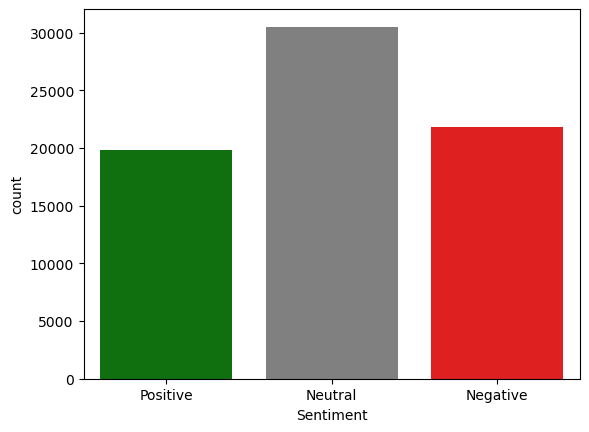

In [93]:
sentiment_colors=["green","grey","red"]
sns.countplot( x=df["Sentiment"], palette=sentiment_colors);

In [67]:
df_topic=df["Topic/Entity"].value_counts().to_frame()

In [69]:
df_topic

,count
Topic/Entity,
TomClancysRainbowSix,2349
CallOfDuty,2333
Verizon,2330
MaddenNFL,2326
Microsoft,2317
WorldOfCraft,2317
LeagueOfLegends,2314
TomClancysGhostRecon,2305
ApexLegends,2305


C:\Users\DELL\AppData\Local\Temp\ipykernel_12992\1301052935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Topic/Entity", x="count", data=df_topic,orient="h",palette="dark")


<Axes: xlabel='count', ylabel='Topic/Entity'>

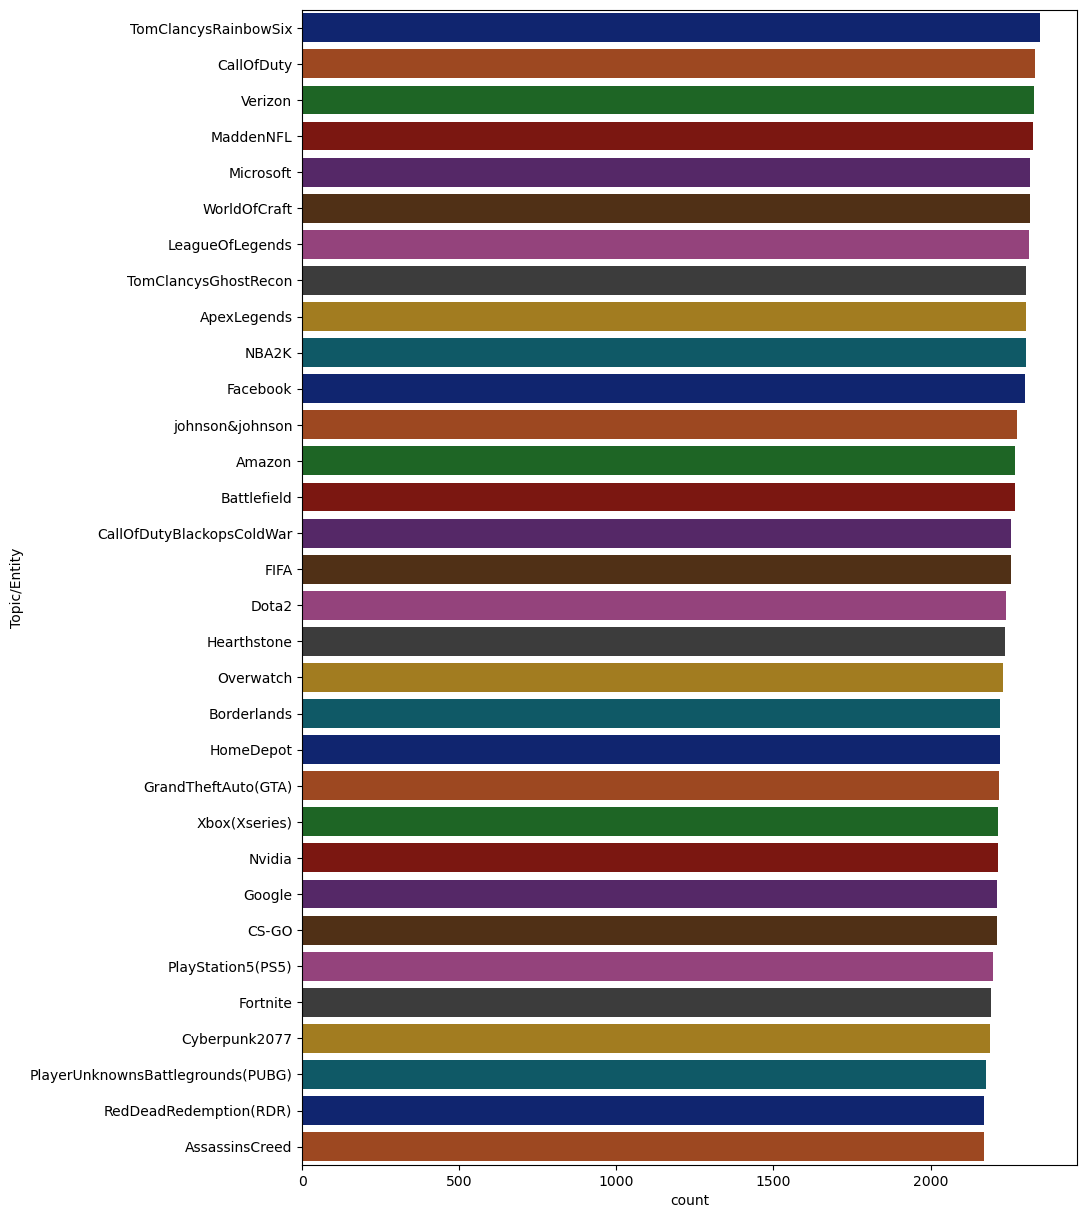

In [95]:
plt.figure(figsize=(10,15))
sns.barplot(y="Topic/Entity", x="count", data=df_topic,orient="h",palette="dark")

In [182]:
df["Topic/Entity"]=="Borderlands"

0         True
1         True
2         True
3         True
4         True
         ...  
75670    False
75671    False
75673    False
75677    False
75678    False
Name: Topic/Entity, Length: 72139, dtype: bool

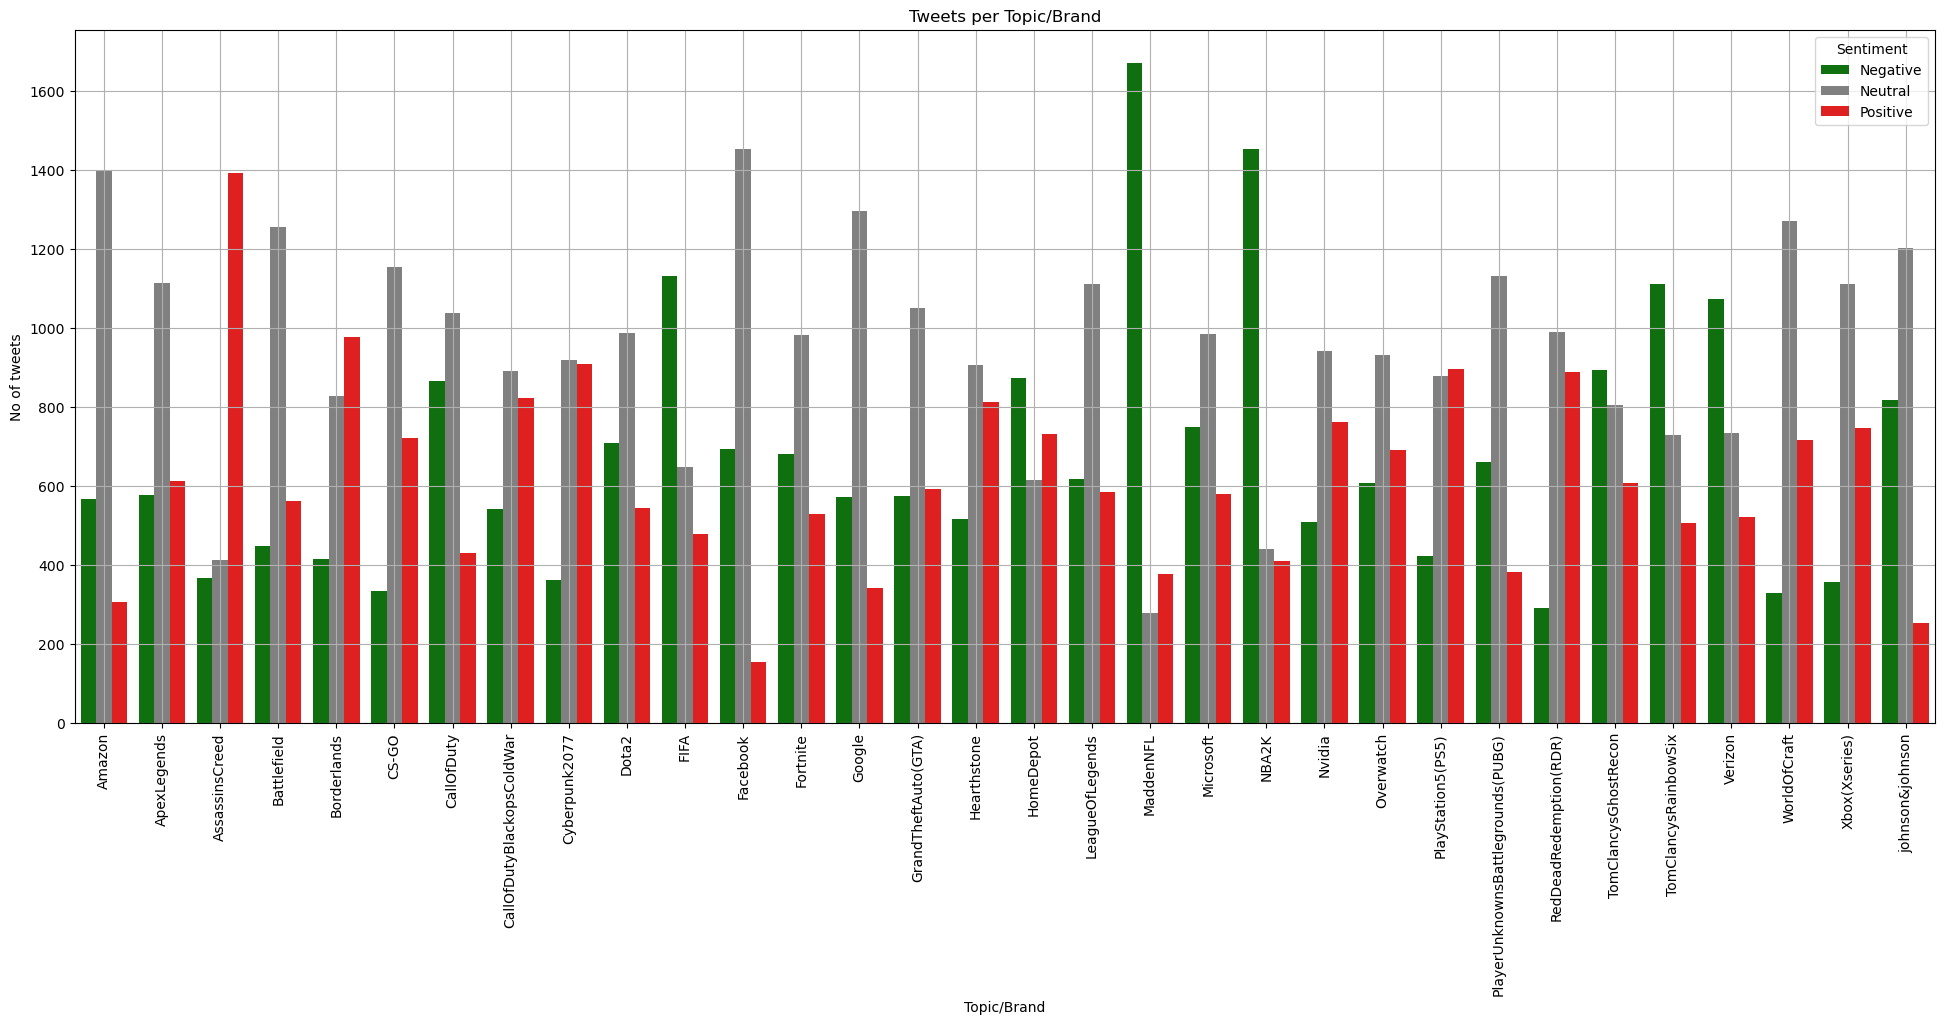

In [178]:
just_plot=df.groupby(["Topic/Entity","Sentiment"]).count().reset_index()
plt.figure(figsize=(24,9))
sns.barplot(x="Topic/Entity", y="Comment",hue="Sentiment",data=just_plot, palette=sentiment_colors)
plt.title("Tweets per Topic/Brand")
plt.xlabel("Topic/Brand")
plt.ylabel("No of tweets")
plt.grid()
plt.xticks(rotation=90);
#i added gridlines to make it look professional
#distribution of brands and their number of tweets with sentiment analysis

In [168]:
df.groupby(["Topic/Entity","Sentiment"]).count().reset_index()

,Topic/Entity,Sentiment,Id,Comment
0,Amazon,Negative,566,566
1,Amazon,Neutral,1398,1398
2,Amazon,Positive,306,306
3,ApexLegends,Negative,577,577
4,ApexLegends,Neutral,1115,1115
...,...,...,...,...
91,Xbox(Xseries),Neutral,1113,1113
92,Xbox(Xseries),Positive,746,746
93,johnson&johnson,Negative,818,818
94,johnson&johnson,Neutral,1202,1202


Text(0, 0.5, 'No of tweets')

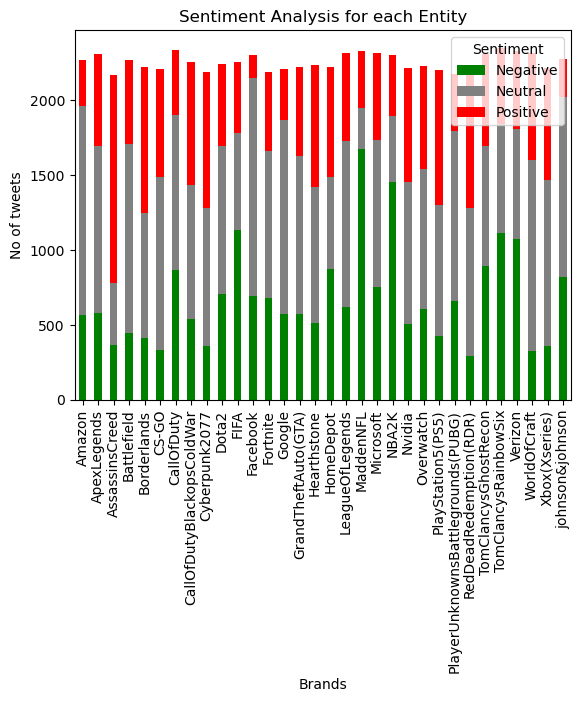

In [208]:
my_plot = df.groupby(["Topic/Entity","Sentiment"]).size().unstack()
my_plot.plot(
    kind= "bar",
    color=sentiment_colors,
    stacked=True
)
plt.title("Sentiment Analysis for each Entity")
plt.xlabel("Brands")
plt.ylabel("No of tweets")


In [204]:
Top_10_topics=df["Topic/Entity"].value_counts().sort_values(ascending=False)[:10]

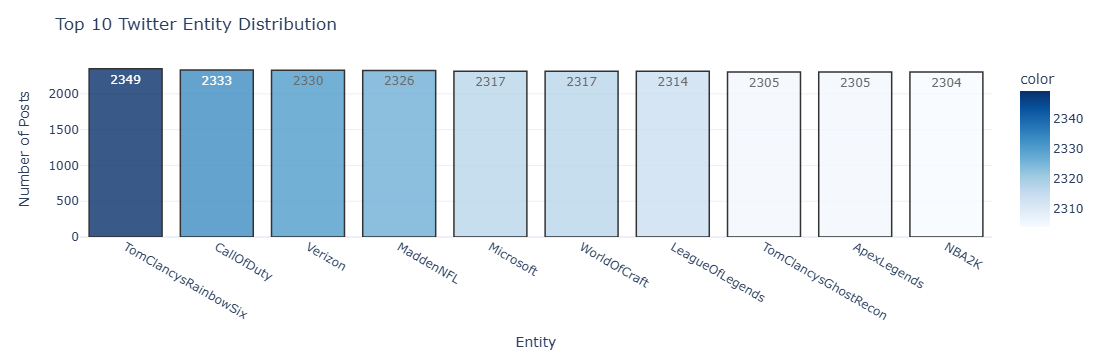

In [212]:
fig = px.bar(x=Top_10_topics.index, 
             y=Top_10_topics.values,
             color=Top_10_topics.values,
             text=Top_10_topics.values,
             color_continuous_scale='Blues')

fig.update_layout(
    title_text='Top 10 Twitter Entity Distribution',
    template='plotly_white',
    xaxis=dict(title='Entity'),
    yaxis=dict(title='Number of Posts')
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()

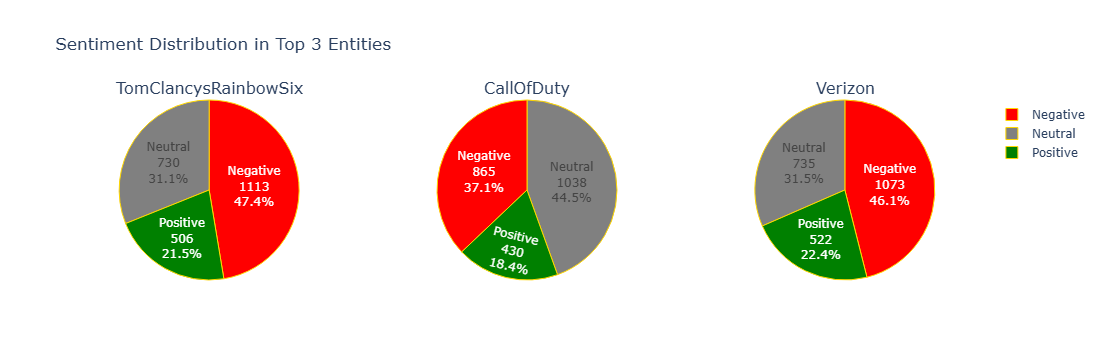

In [266]:
# Sentiment distribution in top 3 entities
sentiment_colorst=["red","grey", "green"]
top3_entity = Top_10_topics.index[:3]
sentiment_by_entity = df[df['Topic/Entity'].isin(top3_entity)].groupby(['Topic/Entity', 'Sentiment']).size().unstack().fillna(0)

fig = make_subplots(rows=1, cols=3, 
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=top3_entity)

for i, entity in enumerate(top3_entity):
    fig.add_trace(
        go.Pie(labels=sentiment_by_entity.columns, 
               values=sentiment_by_entity.loc[entity],
               textinfo='percent+value+label',
               marker_colors=sentiment_colorst,
               textposition='inside',
               name=entity),
        row=1, col=i+1
    )

fig.update_traces(marker_line_color='gold', 
                  marker_line_width=1, 
                  opacity=1)

fig.update_layout(title_text='Sentiment Distribution in Top 3 Entities')
fig.show()

In [276]:
sentiment_by_entity.columns

Index(['Negative', 'Neutral', 'Positive'], dtype='object', name='Sentiment')